# Information Extraction

Information extraction is a task of automatically extracting structured information from unstructured and/or semi-structured documents. In most of the cases, this activity concerns processing human language texts by means of NLP.
- Input : Unstructered Text, Digital texts, web pages, emails, etc
- Output : structured data, Knowledge Graph 
<img src="RE_output.JPG">

## Information Extraction Pipeline
<img src="NER.JPG">


### Step 1. 
**Coreference resolution** is the NLP (Natural Language Processing) equivalent of endophoric awareness used in information retrieval systems, conversational agents, and virtual assistants like Amazon’s Alexa. It is the task of clustering mentions in text that refer to the same underlying entities.
For example:
<img src="https://miro.medium.com/max/3534/1*YestCzcJ4zvlioClwmVNsQ.png">

Algorithms which resolve coreferences commonly look for the nearest preceding mention that is compatible with the referring expression. Instead of using rule-based dependency parse trees, neural networks can also be trained which take into account word embeddings and distance between mentions as features.

In [ ]:
#Installing required Packages
!pip install git+https://github.com/huggingface/neuralcoref.git
!pip install transformers==3.4.0
!pip install torch==1.6.0
!pip install git+https://github.com/thunlp/OpenNRE.git

  Cloning https://github.com/huggingface/neuralcoref.git to /tmp/pip-req-build-x4b49zwj
  Running command git clone -q https://github.com/huggingface/neuralcoref.git /tmp/pip-req-build-x4b49zwj
  Cloning https://github.com/thunlp/OpenNRE.git to /tmp/pip-req-build-fsrv28hv
  Running command git clone -q https://github.com/thunlp/OpenNRE.git /tmp/pip-req-build-fsrv28hv


In [ ]:
!pip install git+https://github.com/thunlp/OpenNRE.git

  Cloning https://github.com/thunlp/OpenNRE.git to /tmp/pip-req-build-v44xwrxv
  Running command git clone -q https://github.com/thunlp/OpenNRE.git /tmp/pip-req-build-v44xwrxv


In [ ]:
import spacy
spacy.__version__

'2.2.4'

In [ ]:
#!pip install neuralcoref --no-binary neuralcoref

In [ ]:
#Load your usual SpaCy model (one of SpaCy English models)
import spacy
nlp = spacy.load('en_core_web_sm')

# Add neural coref to SpaCy's pipe
import neuralcoref
neuralcoref.add_to_pipe(nlp)

# You can now use NeuralCoref as you usually manipulate a SpaCy document annotations.
doc = nlp('My sister has a dog. She loves him.')


/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: spacy.vocab.Vocab size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
  return f(*args, **kwds)


You can retrieve a list of all the clusters of corefering mentions using the `doc._.coref_clusters` attribute

In [ ]:
doc._.coref_clusters

[My sister: [My sister, She], a dog: [a dog, him]]

Replacing corefering mentions with the main mentions in each cluster by using the `doc._.coref_resolved` attribute

In [ ]:
doc._.coref_resolved

'My sister has a dog. My sister loves a dog.'

In [ ]:
doc = nlp('David went to the concert. He said it was an amazing experience.')
doc._.coref_clusters,doc._.coref_resolved

([David: [David, He]],
 'David went to the concert. David said it was an amazing experience.')

In [ ]:
txt = """Elon Musk is a business magnate, industrial designer, and engineer. He is the founder, CEO, CTO, and chief designer of SpaceX.
          He is also early investor, CEO, and product architect of Tesla, Inc.
          He is also the founder of The Boring Company and the co-founder of Neuralink.
          A centibillionaire, Musk became the richest person in the world in January 2021, 
          with an estimated net worth of $185 billion at the time, surpassing Jeff Bezos. 
          Musk was born to a Canadian mother and South African father and raised in Pretoria, South Africa.
          He briefly attended the University of Pretoria before moving to Canada aged 17 to attend Queen's University. 
          He transferred to the University of Pennsylvania two years later, where he received dual bachelor's degrees in economics
          and physics. He moved to California in 1995 to attend Stanford University,but decided instead to pursue a business career.
          He went on co-founding a web software company Zip2 with his brother Kimbal Musk"""

In [ ]:
doc = nlp(txt)
resolved_text = doc._.coref_resolved
resolved_text

"Elon Musk is a business magnate, industrial designer, and engineer. Elon Musk is the founder, CEO, CTO, and chief designer of SpaceX.\n          Elon Musk is also early investor, CEO, and product architect of Tesla, Inc.\n          Elon Musk is also the founder of The Boring Company and the co-founder of Neuralink.\n          A centibillionaire, Elon Musk became the richest person in the world in January 2021, \n          with an estimated net worth of $185 billion at the time, surpassing Jeff Bezos. \n          Elon Musk was born to a Canadian mother and South African father and raised in Pretoria, South Africa.\n          Elon Musk briefly attended the University of Pretoria before moving to Canada aged 17 to attend Queen's University. \n          Elon Musk transferred to Queen's University two years later, where Elon Musk received dual bachelor's degrees in economics\n          and physics. Elon Musk moved to California in 1995 to attend Queen's University,but decided instead to pu

In this example, there are no advanced coreference resolution techniques required. The Neuralcoref model changed a couple of pronouns “He” to “Elon Musk”. While it might seem very simple, this is an important step that will increase the overall efficiency of our Infomation Extraction pipeline.

In [ ]:
#clusters #list of all the clusters of corefering mentions
#doc._.coref_clusters

## Named Entity Recognition
Named Entity Recognition NER works by locating and identifying the named entities present in unstructured text into the standard categories such as person names, locations, organizations, time expressions, quantities, monetary values, percentage, codes etc. 
<img src="NE.JPG">

## Limitations of NER
- A single real world entity can have many different text records
- There is no silver bullet NLP model, various domains require custom models
- No model is 100% accurate.

### Step 2. 
**Named Entity Linking** will assign a unique identity to entities mentioned in the text. 
In other words, Named Entity Linking is the task to link entity mentions in text with their corresponding entities in a knowledge base.
 For example text, “President Ford granted a pardon to President Nixon.”, we would first identify all the words of interests, such as ‘Ford’. This is called Named Entity Recognition (NER). The word ‘Ford’ can refer to **President Gerald Ford**, **Henry Ford**, or the car company “Ford”. As such, the second step in a pipeline is candidate selection, where we narrow down the list of possible candidates for the identified words of interest. Subsequently, we disambiguate entities from the candidate list and link each identified entity to a unique identifier within a knowledge base. In the example above, we should ideally identify the entity ‘Ford’ as ‘Gerald Ford’.
<img src="https://miro.medium.com/max/700/0*IOOZpjlLaJUWjex9">


### Wikification : 
Entity linking techniques that map named entities to Wikipedia entities.
wikiID
<img src="wikiID.JPG">

Wikifier API is used : <a href="http://wikifier.org/info.html" target="_blank">Wikifier</a>

In [ ]:
import urllib
from string import punctuation
import nltk
import json
import itertools

#ENTITY_TYPES = ["human", "person", "company", "enterprise", "business", "geographic region",
#                "human settlement", "geographic entity", "territorial entity type", "organization"]
ENTITY_TYPES = ["People", "time", "event", "person", "business", "company", "neighborhood", "deceasedperson", "film", "region", "ethnicity", "location", "country", "administrative_division", "us_county"]

def wikifier(text, lang="en", threshold=0.8):
    """Function that fetches entity linking results from wikifier.com API"""
    # Prepare the URL.
    data = urllib.parse.urlencode([
        ("text", text), ("lang", lang),
        ("userKey", "tgbdmkpmkluegqfbawcwjywieevmza"),
        ("pageRankSqThreshold", "%g" %
         threshold), ("applyPageRankSqThreshold", "true"),
        ("nTopDfValuesToIgnore", "100"), ("nWordsToIgnoreFromList", "100"),
        ("wikiDataClasses", "true"), ("wikiDataClassIds", "false"),
        ("support", "true"), ("ranges", "false"), ("minLinkFrequency", "2"),
        ("includeCosines", "false"), ("maxMentionEntropy", "3")
    ])
    url = "http://www.wikifier.org/annotate-article"
    # Call the Wikifier and read the response.
    req = urllib.request.Request(url, data=data.encode("utf8"), method="POST")
    with urllib.request.urlopen(req, timeout=60) as f:
        response = f.read()
        response = json.loads(response.decode("utf8"))
    # Output the annotations.
    results = list()
    
    for annotation in response["annotations"]:
        # Filter out desired entity classes
        print(annotation)
        print ("!title : ", annotation['title'])
        print("*****")
        print ("!response.wikiDataItemId : ", annotation['wikiDataItemId'])
        print("################################")
        if ('wikiDataClasses' in annotation) and (any([el['enLabel'] in ENTITY_TYPES for el in annotation['wikiDataClasses']])):

            # Specify entity label
            if any([el['enLabel'] in ["human", "person"] for el in annotation['wikiDataClasses']]):
                label = 'Person'
            elif any([el['enLabel'] in ["company", "enterprise", "business", "organization"] for el in annotation['wikiDataClasses']]):
                label = 'Organization'
            elif any([el['enLabel'] in ["geographic region", "human settlement", "geographic entity", "territorial entity type"] for el in annotation['wikiDataClasses']]):
                label = 'Location'
            else:
                label = None

            results.append({'title': annotation['title'], 'wikiId': annotation['wikiDataItemId'], 'label': label,
                            'characters': [(el['chFrom'], el['chTo']) for el in annotation['support']]})
            print(results)
            break
    return results

In [ ]:
wikifier("Elon Musk is a business magnate, industrial designer, and engineer. Elon Musk is the founder, CEO, CTO, and chief designer of SpaceX")

{'title': 'Elon Musk', 'url': 'http://en.wikipedia.org/wiki/Elon_Musk', 'lang': 'en', 'pageRank': 0.05254839199814167, 'secLang': 'en', 'secTitle': 'Elon Musk', 'secUrl': 'http://en.wikipedia.org/wiki/Elon_Musk', 'wikiDataItemId': 'Q317521', 'wikiDataClasses': [{'itemId': 'Q5', 'enLabel': 'human'}, {'itemId': 'Q215627', 'enLabel': 'person'}, {'itemId': 'Q154954', 'enLabel': 'natural person'}, {'itemId': 'Q164509', 'enLabel': 'omnivore'}, {'itemId': 'Q830077', 'enLabel': 'subject'}, {'itemId': 'Q24229398', 'enLabel': 'agent'}, {'itemId': 'Q18336849', 'enLabel': 'item with given name property'}, {'itemId': 'Q795052', 'enLabel': 'individual'}, {'itemId': 'Q3778211', 'enLabel': 'legal person'}, {'itemId': 'Q72638', 'enLabel': 'consumer'}, {'itemId': 'Q35120', 'enLabel': 'entity'}, {'itemId': 'Q23958946', 'enLabel': 'individual entity'}, {'itemId': 'Q26720107', 'enLabel': 'subject of a right'}, {'itemId': 'Q159344', 'enLabel': 'heterotroph'}, {'itemId': 'Q7239', 'enLabel': 'organism'}, {'it

[{'characters': [(0, 8), (5, 8), (68, 76), (73, 76)],
  'label': 'Person',
  'title': 'Elon Musk',
  'wikiId': 'Q317521'}]

In [ ]:
wikifier("One of the newest auditoriums in New York , built into the bedrock below Carnegie Hall , has added a dose of richness to the concert scene.")

{'title': 'New York (state)', 'url': 'http://en.wikipedia.org/wiki/New_York_(state)', 'lang': 'en', 'pageRank': 0.03762592137391238, 'secLang': 'en', 'secTitle': 'New York (state)', 'secUrl': 'http://en.wikipedia.org/wiki/New_York_(state)', 'wikiDataItemId': 'Q1384', 'wikiDataClasses': [{'itemId': 'Q35657', 'enLabel': 'state of the United States'}, {'itemId': 'Q852446', 'enLabel': 'administrative territorial entity of the United States'}, {'itemId': 'Q107390', 'enLabel': 'federated state'}, {'itemId': 'Q10864048', 'enLabel': 'first-level administrative country subdivision'}, {'itemId': 'Q192611', 'enLabel': 'constituency'}, {'itemId': 'Q15916867', 'enLabel': 'administrative territorial entity of a single country'}, {'itemId': 'Q56061', 'enLabel': 'administrative territorial entity'}, {'itemId': 'Q5164076', 'enLabel': 'constituent state'}, {'itemId': 'Q1799794', 'enLabel': 'administrative territorial entity of a specific level'}, {'itemId': 'Q1048835', 'enLabel': 'political territorial 

[{'characters': [(33, 40)],
  'label': 'Organization',
  'title': 'New York (state)',
  'wikiId': 'Q1384'}]

In [ ]:
txt = ("The Rev. Charles Hewawasam , a Roman Catholic priest who lost a nun and 18 members of his congregation in Matara , Sri Lanka , saw the tsunami as a reaction to ethnic and religious tensions . ")

In [ ]:
wikifier(txt)

{'title': 'Catholic Church', 'url': 'http://en.wikipedia.org/wiki/Catholic_Church', 'lang': 'en', 'pageRank': 0.02169495699554522, 'secLang': 'en', 'secTitle': 'Catholic Church', 'secUrl': 'http://en.wikipedia.org/wiki/Catholic_Church', 'wikiDataItemId': 'Q9592', 'wikiDataClasses': [{'itemId': 'Q879146', 'enLabel': 'Christian denomination'}, {'itemId': 'Q34651', 'enLabel': 'Christian Church'}, {'itemId': 'Q13414953', 'enLabel': 'religious denomination'}, {'itemId': 'Q1530022', 'enLabel': 'religious organization'}, {'itemId': 'Q94670589', 'enLabel': 'Christian organization'}, {'itemId': 'Q43229', 'enLabel': 'organization'}, {'itemId': 'Q24229398', 'enLabel': 'agent'}, {'itemId': 'Q16334295', 'enLabel': 'group of humans'}, {'itemId': 'Q23958946', 'enLabel': 'individual entity'}, {'itemId': 'Q16334298', 'enLabel': 'group of living things'}, {'itemId': 'Q35120', 'enLabel': 'entity'}, {'itemId': 'Q61961344', 'enLabel': 'group of physical objects'}, {'itemId': 'Q517966', 'enLabel': 'structur

[{'characters': [(106, 111), (106, 123)],
  'label': 'Organization',
  'title': 'Matara, Sri Lanka',
  'wikiId': 'Q13360574'}]

### Step 3. 
**Relationship Extraction** :  It is the task of extracting semantic relationships from text, which usually occur between two or more entities. These relations can be of different types. E.g “Paris is in France” states a “is in” relationship from Paris to France. This can be denoted using triples, (Paris, is in, France). 
Relation extraction is a crucial technique in automatic knowledge graph construction. By using relation extraction, we can accumulatively extract new relation facts and expand the knowledge graph, which, as a way for machines to understand the human world, has many downstream applications like question answering, recommender system and search engine.

We have used <a href="https://opennre-docs.readthedocs.io/en/latest/get_started/introduction.html" target="_blank">OpenNRE</a> here.
The following models are available currently:
- wiki80_cnn_softmax: trained on wiki80 dataset with a CNN encoder.
- wiki80_bert_softmax: trained on wiki80 dataset with a BERT encoder.
- wiki80_bertentity_softmax: trained on wiki80 dataset with a BERT encoder (using entity representation concatenation).
- tacred_bert_softmax: trained on TACRED dataset with a BERT encoder.
- tacred_bertentity_softmax: trained on TACRED dataset with a BERT encoder (using entity representation concatenation).

In [ ]:
import opennre
model = opennre.get_model('wiki80_bert_softmax')
#model = model.cuda()

entities_threshold = 0.8


relations_list = []
# First get all the entities in the sentence
#entities = wikifier(resolved_text, threshold=entities_threshold)
entities = wikifier(txt, threshold=entities_threshold)
#entities

2021-08-01 06:27:50,107 - root - INFO - Loading BERT pre-trained checkpoint.


{'title': 'Catholic Church', 'url': 'http://en.wikipedia.org/wiki/Catholic_Church', 'lang': 'en', 'pageRank': 0.02169495699554522, 'secLang': 'en', 'secTitle': 'Catholic Church', 'secUrl': 'http://en.wikipedia.org/wiki/Catholic_Church', 'wikiDataItemId': 'Q9592', 'wikiDataClasses': [{'itemId': 'Q879146', 'enLabel': 'Christian denomination'}, {'itemId': 'Q34651', 'enLabel': 'Christian Church'}, {'itemId': 'Q13414953', 'enLabel': 'religious denomination'}, {'itemId': 'Q1530022', 'enLabel': 'religious organization'}, {'itemId': 'Q94670589', 'enLabel': 'Christian organization'}, {'itemId': 'Q43229', 'enLabel': 'organization'}, {'itemId': 'Q24229398', 'enLabel': 'agent'}, {'itemId': 'Q16334295', 'enLabel': 'group of humans'}, {'itemId': 'Q23958946', 'enLabel': 'individual entity'}, {'itemId': 'Q16334298', 'enLabel': 'group of living things'}, {'itemId': 'Q35120', 'enLabel': 'entity'}, {'itemId': 'Q61961344', 'enLabel': 'group of physical objects'}, {'itemId': 'Q517966', 'enLabel': 'structur

In [ ]:
model.infer({'text': 'The Rev. Charles Hewawasam , a Roman Catholic priest who lost a nun and 18 members of his congregation in Matara , Sri Lanka , saw the tsunami as a reaction to ethnic and religious tensions . ', 'h': {'pos': (115, 124)}, 't': {'pos': (106, 112)}})


('contains administrative territorial entity', 0.6635950803756714)

In [ ]:
model.infer({'text': 'One of the newest auditoriums in New York , built into the bedrock below Carnegie Hall , has added a dose of richness to the concert scene .', 'h': {'pos': (32, 40)}, 't': {'pos': (72, 85)}})


('occupant', 0.9436891674995422)

In [ ]:
model.infer({'text': "A lot of people wo n't go across the river to Hoboken because , ` Oh , my god , that 's New Jersey .", 'h': {'pos': (87, 97)}, 't': {'pos': (45, 52)}})


('residence', 0.7096606492996216)

In [ ]:
entities[0]

{'characters': [(106, 111), (106, 123)],
 'label': 'Organization',
 'title': 'Matara, Sri Lanka',
 'wikiId': 'Q13360574'}

In [ ]:
#list(itertools.permutations(entities, 2))[0] 

In [ ]:
# Iterate over every permutation pair of entities
relation_threshold = 0.96
for permutation in itertools.permutations(entities, 2):
    for source in permutation[0]['characters']:
        for target in permutation[1]['characters']:
            # Relationship extraction with OpenNRE
            data = model.infer(
                {'text': resolved_text, 'h': {'pos': [source[0], source[1] + 1]}, 't': {'pos': [target[0], target[1] + 1]}})
            if data[1] > relation_threshold:
                print (data[1],permutation[0]['title'],permutation[1]['title'], data[0])
            
                relations_list.append(
                    {'source': permutation[0]['title'], 'target': permutation[1]['title'], 'type': data[0]})

In [ ]:
relations = [dict(y) for y in set(tuple(x.items()) for x in relations_list)]
relations

[]

In [ ]:
relation_threshold = 0.96
for permutation in itertools.permutations(entities, 2):
  print(permutation)

In [ ]:
# Iterate over every permutation pair of entities
relation_threshold = 0.96
for permutation in itertools.permutations(entities, 2):
  for source in permutation[0]['characters']:
    for target in permutation[1]['characters']:
      data = model.infer(
                {'text': resolved_text, 'h': {'pos': [source[0], source[1] + 1]}, 't': {'pos': [target[0], target[1] + 1]}})
      if data[1] > relation_threshold:
        print(data[1],permutation[0]['title'],permutation[1]['title'], data[0])
        print(data)

 ### Step 4. 
 **Knowledge Graph** is a variant of semantic network with added constraints whose scope, structure, characteristics and even uses are not fully realized and in the process of development.

 In our example:
 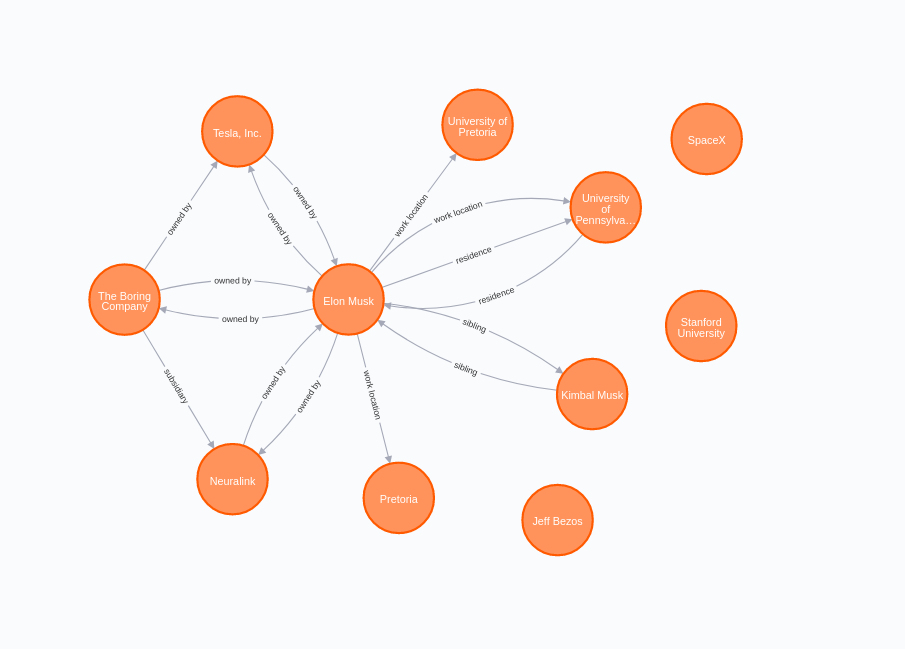

For implementation of Knowledge Graphs we need Neo4j using Graph databases, For more information refer [this.](https://medium.com/neo4j/making-sense-of-news-the-knowledge-graph-way-d33810ce5005)

# Code starts

In [ ]:
import opennre
model = opennre.get_model('wiki80_bert_softmax')

2021-08-01 06:27:55,479 - root - INFO - Loading BERT pre-trained checkpoint.


In [ ]:
import urllib
from string import punctuation
import nltk
import json
import itertools

#ENTITY_TYPES = ["human", "person", "company", "enterprise", "business", "geographic region",
#                "human settlement", "geographic entity", "territorial entity type", "organization"]
ENTITY_TYPES = ["People", "time", "event", "person", "business", "company", "neighborhood", "deceasedperson", "film", "region", "ethnicity", "location", "country", "administrative_division", "us_county"]

def wikifier(text, lang="en", threshold=-1):
    """Function that fetches entity linking results from wikifier.com API"""
    # Prepare the URL.
    data = urllib.parse.urlencode([
        ("text", text), ("lang", lang),
        ("userKey", "tgbdmkpmkluegqfbawcwjywieevmza"),
        ("pageRankSqThreshold", "%g" %
         threshold), ("applyPageRankSqThreshold", "true"),
        ("nTopDfValuesToIgnore", "100"), ("nWordsToIgnoreFromList", "100"),
        ("wikiDataClasses", "true"), ("wikiDataClassIds", "false"),
        ("support", "true"), ("ranges", "false"), ("minLinkFrequency", "2"),
        ("includeCosines", "false"), ("maxMentionEntropy", "3")
    ])
    url = "http://www.wikifier.org/annotate-article"
    # Call the Wikifier and read the response.
    req = urllib.request.Request(url, data=data.encode("utf8"), method="POST")
    with urllib.request.urlopen(req, timeout=60) as f:
        response = f.read()
        response = json.loads(response.decode("utf8"))
    # Output the annotations.
    results = list()
    i =0;
    for annotation in response["annotations"]:
        print(annotation)
        # Filter out desired entity classes
        #print ("!title : ", annotation['title'])
        #print("*****")
        #print ("!response.wikiDataItemId : ", annotation['wikiDataItemId'])
        #print("################################")
        #print(i)
        if ('wikiDataClasses' in annotation) and (any([el['enLabel'] in ENTITY_TYPES for el in annotation['wikiDataClasses']])):
            for el in annotation['wikiDataClasses']:
              if (el['enLabel'] in ENTITY_TYPES):
                      label = el['enLabel']   
                      break
            results.append({'title': annotation['title'], 'wikiId': annotation['wikiDataItemId'], 'label': label,
                            'characters': [(el['chFrom'], el['chTo']) for el in annotation['support']], 'pagerank':annotation['pageRank']})
    if len(results)>2:
       results = sorted(results.items(), key =lambda kv:(kv[1], kv[0]))
       results = results[-2:]
    
    return results

In [ ]:
txt = "When Ms. Rice arrived in Oslo , Norway , on Wednesday for a meeting with NATO ministers , she declined to comment on the subpoena ."

In [ ]:
doc = nlp(txt)
resolved_text = doc._.coref_resolved
resolved_text

'When Ms. Rice arrived in Oslo , Norway , on Wednesday for a meeting with NATO ministers , Ms. Rice declined to comment on the subpoena .'

In [ ]:
result = wikifier(resolved_text)

{'title': 'When (Shania Twain song)', 'url': 'http://en.wikipedia.org/wiki/When_(Shania_Twain_song)', 'lang': 'en', 'pageRank': 0.004121085684906071, 'secLang': 'en', 'secTitle': 'When (Shania Twain song)', 'secUrl': 'http://en.wikipedia.org/wiki/When_(Shania_Twain_song)', 'wikiDataItemId': 'Q7992410', 'wikiDataClasses': [{'itemId': 'Q134556', 'enLabel': 'single'}, {'itemId': 'Q2031291', 'enLabel': 'release'}, {'itemId': 'Q732577', 'enLabel': 'publication'}, {'itemId': 'Q2188189', 'enLabel': 'musical work'}, {'itemId': 'Q386724', 'enLabel': 'work'}, {'itemId': 'Q838948', 'enLabel': 'work of art'}, {'itemId': 'Q15401930', 'enLabel': 'product'}, {'itemId': 'Q16686448', 'enLabel': 'artificial entity'}, {'itemId': 'Q17537576', 'enLabel': 'creative work'}, {'itemId': 'Q18593264', 'enLabel': 'item of collection or exhibition'}, {'itemId': 'Q28877', 'enLabel': 'goods'}, {'itemId': 'Q488383', 'enLabel': 'object'}, {'itemId': 'Q551997', 'enLabel': 'wire'}, {'itemId': 'Q35120', 'enLabel': 'entit

AttributeError: ignored

In [ ]:
for el in result:
  print(el)

In [ ]:
for el in result:
    print(el)

{'title': 'Oslo', 'wikiId': 'Q585', 'label': 'location', 'characters': [(25, 28), (25, 37)], 'pagerank': 0.06611331737596278}
{'title': 'Norway', 'wikiId': 'Q20', 'label': 'country', 'characters': [(32, 37)], 'pagerank': 0.05156403227960502}
{'title': 'Trump Tower meeting', 'wikiId': 'Q33015021', 'label': 'event', 'characters': [(58, 66)], 'pagerank': 0.006495706109211948}
{'title': '2018 Russia–United States summit', 'wikiId': 'Q55230658', 'label': 'event', 'characters': [(60, 66)], 'pagerank': 0.01561481206993901}


In [ ]:
print(result)

[{'title': 'Oslo', 'wikiId': 'Q585', 'label': 'location', 'characters': [(25, 28), (25, 37)]}]


In [ ]:
loc = '/'+ result[0]['label'] + '/' + result[1]['label'] + '/'

In [ ]:
loc

'/location/location/'

In [ ]:
key_value ={}   

# Initializing the value
key_value[2] = 56      
key_value[1] = 2
key_value[5] = 12
key_value[4] = 24
key_value[6] = 18     
key_value[3] = 323

In [ ]:
/len(key_value)

6

In [ ]:
key_value =sorted(key_value.items(), key =lambda kv:(kv[1], kv[0]))

In [ ]:
print(key_value)

[(1, 2), (5, 12), (6, 18), (4, 24), (2, 56), (3, 323)]


In [ ]:
result = key_value[-2:]

In [ ]:
print(result)

[(2, 56), (3, 323)]


In [1]:
from google.colab import drive 

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [5]:
import os
os.chdir("drive/MyDrive/Cogni_AI/Hackathon_3/Predictions")

FileNotFoundError: ignored

In [3]:
import pandas as pd

In [6]:
test_df = pd.read_excel('Submission_Entity_874384_1.xlsx')

In [7]:
test_df.head()

,text,h_name,t_name,relation
0,"The Little Comedy , '' a mannered operetta bas...",Arthur Schnitzler,Vienna,/person/location/after a work by
1,A court in Rome acquitted five people accused ...,Rome,Holy See,/location/location/country
2,There were also performers who were born in Lo...,Lucinda Williams,Jerry Lee Lewis,/person/person/sibling
3,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...
4,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...


In [ ]:
test_df.shape

(11086, 4)

In [ ]:
df = test_df.copy()

In [ ]:
df.text

0        The Little Comedy , '' a mannered operetta bas...
1        A court in Rome acquitted five people accused ...
2        There were also performers who were born in Lo...
3        When Julian Resuello , the mayor of San Carlos...
4        When Julian Resuello , the mayor of San Carlos...
                               ...                        
11081    Staten Island Steve Whalen , an aspiring filmm...
11082    Lukacs , a distinguished historian of 20th-cen...
11083    Since accepting an invitation in 1996 from the...
11084    LOYOLA , MD. 62 , ST. PETER 'S 55 -- Michael T...
11085    It became a Shiite pilgrimage center after the...
Name: text, Length: 11086, dtype: object

In [ ]:
df.shape

(11086, 4)

In [ ]:
df.drop_duplicates(subset ="text",
                     keep = False, inplace = True)

In [ ]:
df.shape

(5503, 4)

In [ ]:
data = df.text.values

In [ ]:
data = data.to_string

AttributeError: ignored

"The Little Comedy , '' a mannered operetta based on a short story by Arthur Schnitzler set in fin-de-si Ã¨cle Vienna , opens the evening ."

In [ ]:
import opennre
model = opennre.get_model('wiki80_bert_softmax')
#model = model.cuda()

entities_threshold = 0.8


'''
relations_list = []
# First get all the entities in the sentence
#entities = wikifier(resolved_text, threshold=entities_threshold)
entities = wikifier(txt, threshold=entities_threshold)
#entities
'''

2021-08-01 06:28:03,870 - root - INFO - Loading BERT pre-trained checkpoint.


'\nrelations_list = []\n# First get all the entities in the sentence\n#entities = wikifier(resolved_text, threshold=entities_threshold)\nentities = wikifier(txt, threshold=entities_threshold)\n#entities\n'

In [ ]:
def fun_rel(df):
  wikified_test=[]
  threshold_wiki = 0.8
  relation_threshold = 0.8
  relation_lst = ['nationality', 'locations', 'children', 'advisors', 'majorshareholders', 'place_lived', 'place_founded', 'neighborhood_of','place_of_death', 'featured_film_locations', 'capital', 'founders', 
  'geographic_distribution', 'administrative_divisions', 'place_of_burial', 'company', 'contains', 'country', 'county_seat', 'religion', 'place_of_birth', 'ethnicity']
  for index, row in df.iterrows():
    try:    
      print("Itr:", index)
      entities = wikifier(row['text'], threshold=threshold_wiki)
      max=[ 'NA' ,relation_threshold]
      for permutation in itertools.permutations(entities, 2):
        for source in permutation[0]['characters']:
          for target in permutation[1]['characters']:
            data = model.infer({'text': row['text'], 'h': {'pos': [source[0], source[1] + 1]}, 't': {'pos': [target[0], target[1] + 1]}})
            if data[1] > max[1]:   # and data[0] in relation_lst
              max = data
            #print(data[1],permutation[0]['title'],permutation[1]['title'], data[0])
            #print(data)
      if (len(entities) > 1):
        df.loc[index, 'h_name'] = entities[0]['title']
        df.loc[index,'t_name'] = entities[1]['title'] 
        df.loc[index,'relation'] = '/'+ entities[0]['label'] + '/' + entities[1]['label'] + '/' + max[0]
        if (max[0] == 'NA'):
          df.loc[index,'relation'] = 'NA'
      else:
        continue
    except:
      print("Error at index:{}".format(index))
  return df

In [ ]:
def fun_rel(df):
  wikified_test=[]
  threshold_wiki = 0.8
  relation_threshold = 0.8
  relation_lst = ['nationality', 'locations', 'children', 'advisors', 'majorshareholders', 'place_lived', 'place_founded', 'neighborhood_of','place_of_death', 'featured_film_locations', 'capital', 'founders', 
  'geographic_distribution', 'administrative_divisions', 'place_of_burial', 'company', 'contains', 'country', 'county_seat', 'religion', 'place_of_birth', 'ethnicity']
  for index, row in df.iterrows():
    '''
    try:    
      print("Itr:", index)
      entities = wikifier(row['text'], threshold=threshold_wiki)
      max=[ 'NA' ,relation_threshold]
      for permutation in itertools.permutations(entities, 2):
        for source in permutation[0]['characters']:
          for target in permutation[1]['characters']:
            data = model.infer({'text': row['text'], 'h': {'pos': [source[0], source[1] + 1]}, 't': {'pos': [target[0], target[1] + 1]}})
            if data[1] > max[1]:   # and data[0] in relation_lst
              max = data
              #print(data[1],permutation[0]['title'],permutation[1]['title'], data[0])
              #print(data)
      if (len(entities) > 1):
        df.loc[index, 'h_name'] = entities[0]['title']
        df.loc[index,'t_name'] = entities[1]['title'] 
        df.loc[index,'relation'] = '/'+ entities[0]['label'] + '/' + entities[1]['label'] + '/' + max[0]
        if (max[0] == 'NA'):
          df.loc[index,'relation'] = 'NA'
      else:
      continue
    except:
    print("Error at index:{}".format(index))
    '''
  return df

In [ ]:
"""
for i in range(11):
  start = int(i*1000)
  end = int(i*1000)+1000
  df_ = test_df.loc[start:end]
  df_ = fun_rel(df_)
  name = 'pred_'+str(i)+'.xlsx'
  df_.to_excel(name)
  print("completed:", str(i+1))

df_ = test_df.loc[11000:]
df_ = fun_rel(df_)
name = 'pred_12.xlsx'
df_.to_excel(name)
print("finish")
"""

'\nfor i in range(11):\n  start = int(i*1000)\n  end = int(i*1000)+1000\n  df_ = test_df.loc[start:end]\n  df_ = fun_rel(df_)\n  name = \'pred_\'+str(i)+\'.xlsx\'\n  df_.to_excel(name)\n  print("completed:", str(i+1))\n\ndf_ = test_df.loc[11000:]\ndf_ = fun_rel(df_)\nname = \'pred_12.xlsx\'\ndf_.to_excel(name)\nprint("finish")\n'

In [ ]:
test_df['text'].isnull().sum()

0

In [ ]:
df.to_excel('trial_2.xlsx')

In [ ]:
model.infer({'text': 'The Rev. Charles Hewawasam , a Roman Catholic priest who lost a nun and 18 members of his congregation in Matara , Sri Lanka , saw the tsunami as a reaction to ethnic and religious tensions . ', 'h': {'pos': (115, 124)}, 't': {'pos': (106, 112)}})


('contains administrative territorial entity', 0.6635950803756714)

In [ ]:
# Iterate over every permutation pair of entities
relation_threshold = 0.96
for permutation in itertools.permutations(entities, 2):
  for source in permutation[0]['characters']:
    for target in permutation[1]['characters']:
      data = model.infer(
                {'text': resolved_text, 'h': {'pos': [source[0], source[1] + 1]}, 't': {'pos': [target[0], target[1] + 1]}})
      if data[1] > relation_threshold:
        print(data[1],permutation[0]['title'],permutation[1]['title'], data[0])
        print(data)

# Working on predictions

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel('pred_0.xlsx')

In [ ]:
df.shape

(1001, 5)

In [ ]:
df.head()

,Unnamed: 0,text,h_name,t_name,relation
0,1000,"In recent days , the Iranians have begun insta...",Iran,Natanz,/country/location/headquarters location
1,1001,Every time Alex Rodriguez walks to the plate a...,Alex Rodriguez,Yankee Stadium,/person/location/residence
2,1002,"The proposed city has its share of crime , mos...",Oslo,Norway,/location/country/country
3,1003,"The proposed city has its share of crime , mos...",Oslo,Norway,/location/country/country
4,1004,"When Ms. Rice arrived in Oslo , Norway , on We...",NaN,NaN,NaN


In [ ]:
df.drop

In [ ]:
for i in range(1,12):
  name = 'pred_'+str(i)+'.xlsx'
  df_ = pd.read_excel(name)
  df_.drop(index=df_.index[0],axis=0,inplace=True)
  df = df.append(df_, ignore_index = True)

In [ ]:
df.shape

(11086, 5)

In [ ]:
df.head(1)

,ind,text,h_name,t_name,relation
0,0,"The Little Comedy , '' a mannered operetta bas...",Arthur Schnitzler,Vienna,/person/location/after a work by


In [ ]:
df.columns = ['ind','text','h_name','t_name','relation']

In [ ]:
i=0
lst=[]
for index, row in df.iterrows():
  if (i != row['ind']):
    lst.append(i)
  i=i+1
print(len(lst))  

0


In [ ]:
lst

[]

In [57]:
#df_final = df.drop(columns=['ind'], axis=1)
df.to_excel('Submission_Entity_874384.xlsx', index=False)

In [36]:
df = pd.read_excel('final_prediction.xlsx')

In [ ]:
df.shape

(11086, 5)

In [56]:
df.isnull().sum()

text              10
h_name             0
t_name             0
relation           0
Final_relation     0
dtype: int64

In [55]:
df['t_name'].fillna('NA', inplace = True)


In [ ]:
df.head()

,ind,text,h_name,t_name,relation
0,0,"The Little Comedy , '' a mannered operetta bas...",Arthur Schnitzler,Vienna,/person/location/after a work by
1,1,A court in Rome acquitted five people accused ...,Rome,Holy See,/location/location/country
2,2,There were also performers who were born in Lo...,Lucinda Williams,Jerry Lee Lewis,/person/person/sibling
3,3,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...
4,4,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...


In [ ]:
df_final.head()

,text,h_name,t_name,relation
0,"The Little Comedy , '' a mannered operetta bas...",Arthur Schnitzler,Vienna,/person/location/after a work by
1,A court in Rome acquitted five people accused ...,Rome,Holy See,/location/location/country
2,There were also performers who were born in Lo...,Lucinda Williams,Jerry Lee Lewis,/person/person/sibling
3,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...
4,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...


In [ ]:
df_final.shape

(11086, 4)

## New Changed format

In [42]:
df = test_df.copy()

In [43]:
df.head()

,text,h_name,t_name,relation
0,"The Little Comedy , '' a mannered operetta bas...",Arthur Schnitzler,Vienna,/person/location/after a work by
1,A court in Rome acquitted five people accused ...,Rome,Holy See,/location/location/country
2,There were also performers who were born in Lo...,Lucinda Williams,Jerry Lee Lewis,/person/person/sibling
3,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...
4,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...


In [44]:
df['Final_relation'] = df['relation']

In [28]:
df_1 = pd.read_excel('trial_1.xlsx')

In [45]:
for index, row in df.iterrows():
  try:
    row['Final_relation'] = row['relation'].split('/')[-1]
  except:
    row['relation'] = None 
df.head(20)

,text,h_name,t_name,relation,Final_relation
0,"The Little Comedy , '' a mannered operetta bas...",Arthur Schnitzler,Vienna,/person/location/after a work by,after a work by
1,A court in Rome acquitted five people accused ...,Rome,Holy See,/location/location/country,country
2,There were also performers who were born in Lo...,Lucinda Williams,Jerry Lee Lewis,/person/person/sibling,sibling
3,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...,contains administrative territorial entity
4,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...,contains administrative territorial entity
5,"A3 Concern Raised by Libya Deal Alex Salmond ,...",Libya,Alex Salmond,/country/person/residence,residence
6,"A3 Concern Raised by Libya Deal Alex Salmond ,...",Libya,Alex Salmond,/country/person/residence,residence
7,"Alex Salmond , the newly elected first ministe...",Alex Salmond,Libya,/person/country/residence,residence
8,"Alex Salmond , the newly elected first ministe...",Alex Salmond,Libya,/person/country/residence,residence
9,"Indeed , Mr. ChÃ¡vez said Sunday that he wishe...",Venezuela,Evo Morales,/country/person/country of citizenship,country of citizenship


In [46]:
df.head(20)

,text,h_name,t_name,relation,Final_relation
0,"The Little Comedy , '' a mannered operetta bas...",Arthur Schnitzler,Vienna,/person/location/after a work by,after a work by
1,A court in Rome acquitted five people accused ...,Rome,Holy See,/location/location/country,country
2,There were also performers who were born in Lo...,Lucinda Williams,Jerry Lee Lewis,/person/person/sibling,sibling
3,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...,contains administrative territorial entity
4,"When Julian Resuello , the mayor of San Carlos...","San Carlos, Pangasinan",Philippines,/location/country/contains administrative terr...,contains administrative territorial entity
5,"A3 Concern Raised by Libya Deal Alex Salmond ,...",Libya,Alex Salmond,/country/person/residence,residence
6,"A3 Concern Raised by Libya Deal Alex Salmond ,...",Libya,Alex Salmond,/country/person/residence,residence
7,"Alex Salmond , the newly elected first ministe...",Alex Salmond,Libya,/person/country/residence,residence
8,"Alex Salmond , the newly elected first ministe...",Alex Salmond,Libya,/person/country/residence,residence
9,"Indeed , Mr. ChÃ¡vez said Sunday that he wishe...",Venezuela,Evo Morales,/country/person/country of citizenship,country of citizenship


In [14]:
tmp = df.iloc[:1,:]
tmp

,text,h_name,t_name,relation
0,"The Little Comedy , '' a mannered operetta bas...",Arthur Schnitzler,Vienna,/person/location/after a work by


In [15]:
tmp[3]

KeyError: ignored